In [25]:
import os
import sys
sys.path.append('/home/users/kkaminski/apps/localaln/')
sys.path.append('/home/users/kkaminski/apps/localpdb')
import torch
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import alntools as aln

In [26]:
def df_to_namespace(dfrow):
    '''
    convert dataframe row to namespace for convenience
    '''
    _, row = next(iter(dfrow.iterrows()))
    return row

In [27]:
csv_file = 'vikram/fragment_6.csv'
emb_file = 'vikram/fragment_6.p'
emb_file_new = 'vikram/fragment_6.emb'

In [28]:
embs = torch.load(emb_file_new)
df = pd.read_csv(csv_file)

row = df_to_namespace(df.head(1))

In [29]:
x, y = embs[0], embs[0]

In [30]:
densitymap = aln.density.embedding_similarity(x, y)
paths, scorematrix = aln.alignment.gather_all_paths(densitymap, norm_rows=False, with_scores=True)
spans_locations = alt.prepare.search_paths(densitymap,
                                                    paths=paths,
                                                    window=10,
                                                    min_span=15)
return pd.DataFrame(spans_locations.values())

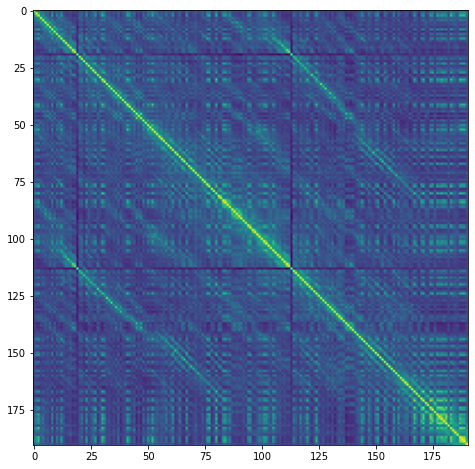

In [31]:
plt.figure(figsize=(8, 8))
plt.imshow(densitymap)

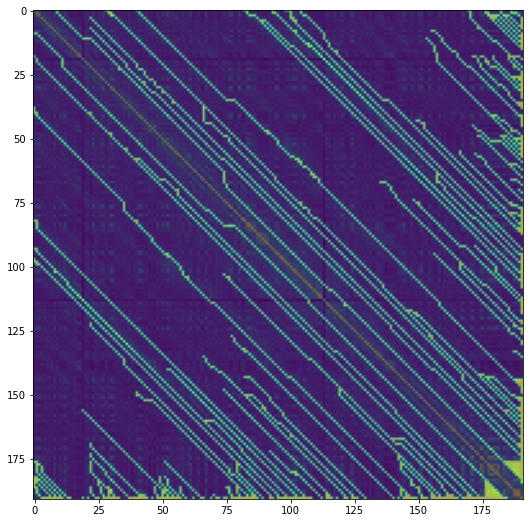

In [32]:
try:
    densitymap = densitymap.numpy()
except:
    pass
paths, scorematrix = aln.alignment.gather_all_paths(densitymap, norm_rows=False, with_scores=True)
pathstart = (190, 190)
maskarr = aln.prepare.mask_like(densitymap, paths)
path = aln.numeric.traceback_from_point_opt2(scorematrix, pathstart)
y, x = path[::-1, 0].ravel(), path[::-1, 1].ravel()
arr_sigma = densitymap.std()
sigma_factor = 2.0
pathvals = densitymap[y, x].ravel()
line_mean = aln.numeric.move_mean(pathvals, 10)
spans = aln.numeric.find_validpoints2_opt(line_mean, mthreshold=sigma_factor*arr_sigma)

fig, ax = plt.subplots(1, 1, figsize=(9, 9))
ax.imshow(densitymap)
ax.imshow(maskarr, alpha=0.6)

In [33]:
spans

[(0, 189)]

In [34]:
np.diag(scorematrix)

array([   0.      ,    5.576534,    9.735466,   18.78537 ,   26.382124,
         34.818768,   43.79965 ,   51.13067 ,   56.484497,   63.736618,
         70.28956 ,   78.97646 ,   83.781975,   91.9811  ,   99.72941 ,
        108.01765 ,  115.95355 ,  122.184525,  128.82523 ,  137.48917 ,
        145.20454 ,  152.40614 ,  161.24527 ,  165.6816  ,  173.83432 ,
        182.31871 ,  189.21088 ,  193.76576 ,  200.82921 ,  209.35873 ,
        213.15623 ,  219.14928 ,  227.77632 ,  236.6079  ,  244.81798 ,
        253.42935 ,  260.5792  ,  268.02158 ,  274.77267 ,  284.90765 ,
        293.73328 ,  297.84552 ,  303.9289  ,  313.49405 ,  321.35837 ,
        327.54285 ,  336.06775 ,  342.31546 ,  349.54446 ,  359.1841  ,
        364.86838 ,  373.12808 ,  377.28372 ,  385.24384 ,  393.47668 ,
        402.1578  ,  409.93887 ,  418.45807 ,  424.74594 ,  433.02905 ,
        440.96558 ,  445.83588 ,  453.0024  ,  461.4395  ,  467.75305 ,
        474.57565 ,  481.12012 ,  485.88623 ,  493.29526 ,  500.

In [35]:
scorematrix

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 5.5765338e+00, 3.1353374e+00, ..., 1.9790306e+00,
        8.2958412e-01, 2.0681063e-40],
       [0.0000000e+00, 2.2998827e+00, 9.7354660e+00, ..., 4.2879047e+00,
        2.3454833e+00, 8.2958412e-01],
       ...,
       [0.0000000e+00, 1.3356751e+00, 3.4271793e+00, ..., 1.3055088e+03,
        3.6439230e+02, 2.7691364e+02],
       [0.0000000e+00, 1.4249842e+00, 2.4569626e+00, ..., 3.6675751e+02,
        1.3131180e+03, 3.6439230e+02],
       [0.0000000e+00, 2.6763794e+00, 2.6873896e+00, ..., 2.7424789e+02,
        1.2495114e+33, 1.3131180e+03]], dtype=float32)

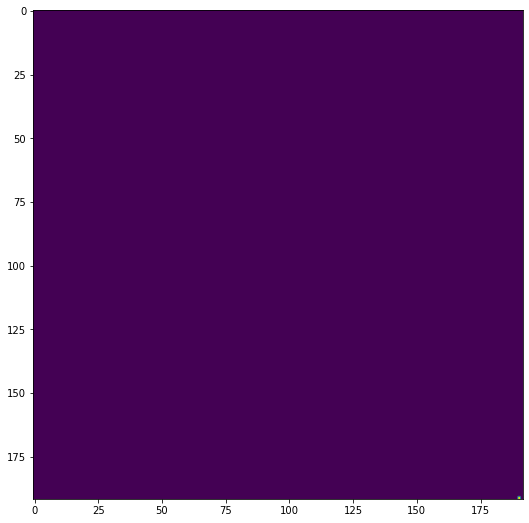

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(9, 9))
ax.imshow(scorematrix)

In [37]:
spans_locations = aln.prepare.search_paths(densitymap,
                                            paths=paths,
                                            window=8,
                                            min_span=10)
results = pd.DataFrame(spans_locations.values())
results = results.sort_values(by=['len'], ascending=False)
indices = results.indices.tolist()
results['y1'] = [yx[0][0] for yx in indices]
results['x1'] = [yx[0][1] for yx in indices]
results['y2'] = [yx[-1][0] for yx in indices]
results['x2'] = [yx[-1][1] for yx in indices]

mask1 = results['x2']

resultsflt = list()
iterator = results.groupby(['y1', 'x1'])
for groupid, group in iterator:
    tmp = group.nlargest(1, ['score'])

In [38]:
group

,pathid,spanid,span_start,span_end,indices,pgauss,score,len,y1,x1,y2,x2
454,133,0,0,17,"[[176, 0], [176, 1], [177, 1], [177, 2], [178,...",-1.061056e-14,0.215328,17,176,0,190,11
453,132,0,0,16,"[[176, 0], [176, 1], [177, 1], [177, 2], [178,...",-4.855174e-13,0.227420,16,176,0,189,10
452,131,0,0,16,"[[176, 0], [176, 1], [177, 1], [177, 2], [178,...",-4.855174e-13,0.227420,16,176,0,189,10


In [39]:
maskx2 = (results['x2'].values[None, :] == results['x2'].values[:, None])
masky2 = (results['y2'].values[None, :] == results['y2'].values[:, None])
maskxy2 = maskx2 | masky2

maskx1 = (results['x1'].values[None, :] == results['x1'].values[:, None])
masky1 = (results['y1'].values[None, :] == results['y1'].values[:, None])
maskxy1 = maskx1 & masky1

In [40]:
ff = maskxy2 & maskxy1

In [41]:
(ff.sum(1) > 1).mean()

0.9945115257958288

In [42]:
results.indices.tolist()[0]

array([[106,  13],
       [107,  13],
       [107,  14],
       [108,  14],
       [109,  15],
       [110,  16],
       [111,  17],
       [112,  18],
       [113,  19],
       [114,  20],
       [115,  21],
       [116,  22],
       [117,  23],
       [118,  24],
       [119,  25],
       [120,  26],
       [121,  27],
       [122,  28],
       [123,  29],
       [124,  30],
       [125,  31],
       [126,  32],
       [127,  33],
       [128,  34],
       [129,  35],
       [130,  36],
       [131,  37],
       [132,  38],
       [133,  39],
       [134,  40],
       [135,  41],
       [136,  42],
       [137,  43],
       [138,  44],
       [139,  45],
       [140,  46],
       [141,  47],
       [142,  48],
       [143,  49],
       [144,  50],
       [145,  51],
       [146,  52],
       [147,  53],
       [148,  54],
       [149,  55],
       [150,  56],
       [151,  57],
       [152,  58],
       [153,  59],
       [154,  60],
       [155,  61],
       [156,  62],
       [157,

In [43]:
results.indices.tolist()[1]

array([[106,  13],
       [107,  13],
       [107,  14],
       [108,  14],
       [109,  15],
       [110,  16],
       [111,  17],
       [112,  18],
       [113,  19],
       [114,  20],
       [115,  21],
       [116,  22],
       [117,  23],
       [118,  24],
       [119,  25],
       [120,  26],
       [121,  27],
       [122,  28],
       [123,  29],
       [124,  30],
       [125,  31],
       [126,  32],
       [127,  33],
       [128,  34],
       [129,  35],
       [130,  36],
       [131,  37],
       [132,  38],
       [133,  39],
       [134,  40],
       [135,  41],
       [136,  42],
       [137,  43],
       [138,  44],
       [139,  45],
       [140,  46],
       [141,  47],
       [142,  48],
       [143,  49],
       [144,  50],
       [145,  51],
       [146,  52],
       [147,  53],
       [148,  54],
       [149,  55],
       [150,  56],
       [151,  57],
       [152,  58],
       [153,  59],
       [154,  60],
       [155,  61],
       [156,  62],
       [157,

In [44]:
mask = aln.prepare.mask_like(densitymap, results.indices)

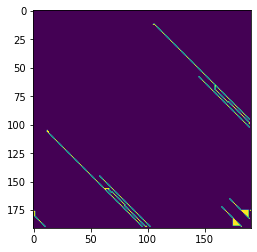

In [45]:
plt.imshow(mask)

In [46]:
# rebuild array


In [47]:
longest = results.nlargest(1, columns=['len'])
longest_indices = longest.indices.tolist()[0]
longest_indices[0], longest_indices[-1]

(array([106,  13], dtype=int32), array([190, 100], dtype=int32))

In [48]:
aln.alignment.draw_alignment(longest_indices, row.sequence, row.sequence)

RI-KGRIIGEGGRARRTIEEMTDTYINVGEYEVAIIGDYERAMAAKQAIEMLA----EGR-MHSTVYRHLERIMREIKRRERLKMWAREEL-
|   |||||||||||||||||||||||||||||||||||||||||||||||||     || ||||||||||| |||||||||||||||||| 
R-L-GAVIGPRGEVKAEIMRRTGTVITVDTENSMVIVEPEAEGIPPVNLMKAAEVVK-AISLGFPPEKAFRL-LEEDQILVVVDLKQVVGDS
